## Computing Alpha, Beta, and R Squared in Python

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

*Running a Regression in Python - continued:*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


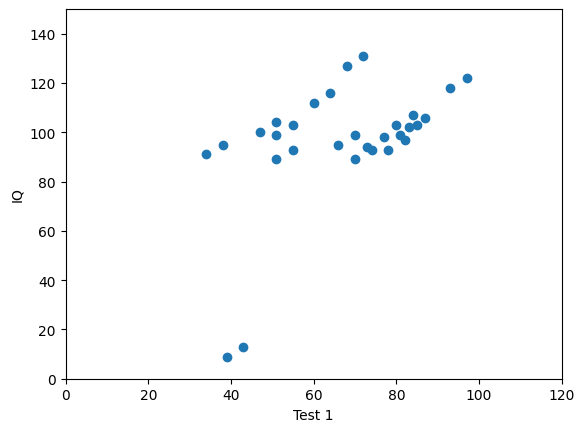

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

data = pd.read_excel('/content/drive/MyDrive/ptdl/tuan10/da07/03_regression/02_computing alpha, beta and R squared/IQ_data.xlsx')

X = data['Test 1']
Y = data['IQ']

plt.scatter(X,Y)
plt.axis([0, 120, 0, 150])
plt.ylabel('IQ')
plt.xlabel('Test 1')
plt.show()

****

Use the statsmodels’ **.add_constant()** method to reassign the X data on X1. Use OLS with arguments Y and X1 and apply the fit method to obtain univariate regression results. Help yourself with the **.summary()** method.

In [ ]:
X1 = sm.add_constant(X)

reg = sm.OLS(Y, X1).fit()

In [ ]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     IQ   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     9.768
Date:                Wed, 05 Nov 2025   Prob (F-statistic):            0.00411
Time:                        13:54:32   Log-Likelihood:                -134.94
No. Observations:                  30   AIC:                             273.9
Df Residuals:                      28   BIC:                             276.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.8828     16.760      2.738      0.011      11.552      80.213
Test 1         0.7587      0.243      3.125      0.004       0.261       1.256
==============================================================================
Omnibus:                       18.268   Durbin-Watson:                   2.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.621
Skew:                          -1.535   Prob(JB):                     7.43e-06
Kurtosis:                       6.077   Cond. No.                         282.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Kết quả Hồi quy OLS (IQ ~ Test 1)

Đây là kết quả của mô hình hồi quy đơn biến, với:

Biến phụ thuộc: IQ

Biến độc lập: Test 1

A. Kết quả chính

Dep. Variable: IQ
→ Biến mà mô hình đang cố gắng dự đoán.

Model: OLS
→ Phương pháp ước lượng: Hồi quy Bình phương tối thiểu thông thường.

R-squared ($R^2$): 0.259
→ Biến Test 1 giải thích 25.9% sự biến thiên của IQ.
→ Quy tắc: $R^2$ càng gần 1, mô hình càng giải thích tốt sự biến thiên của biến phụ thuộc.

Adj. R-squared: 0.232
→ $R^2$ đã điều chỉnh, giúp so sánh các mô hình có số lượng biến khác nhau.

F-statistic: 9.768
→ Thống kê kiểm định ý nghĩa tổng thể của mô hình.

Prob (F-statistic): 0.00411
→ Giá trị P của kiểm định F.
→ Quy tắc: Nếu Prob(F) ≤ 0.05 → mô hình tổng thể có ý nghĩa thống kê.
→ Ở đây $0.00411 \le 0.05$ → mô hình đáng tin cậy.

Test 1 (coef): 0.7587
→ Khi Test 1 tăng 1 đơn vị, IQ dự đoán tăng 0.7587 đơn vị.

Test 1 (P>t): Không cung cấp.

const (coef): 45.8828
→ Giá trị dự đoán của IQ khi Test 1 bằng 0.

const (P>t): Không cung cấp.

B. Giải thích các Chỉ số Chẩn đoán (Diagnostics)

Prob(Omnibus): 0.000
→ Kiểm định tính chuẩn của phần dư.
→ Nếu ≤ 0.05 → phần dư không phân phối chuẩn.
→ Ở đây $0.000 \le 0.05$ → phần dư không chuẩn.

Prob(JB) (Jarque-Bera): $7.43 \times 10^{-6}$
→ Kiểm định tính chuẩn thứ hai của phần dư.
→ Nếu ≤ 0.05 → phần dư không phân phối chuẩn.
→ Giá trị rất nhỏ → phần dư bị lệch/nhọn (non-normal).

Durbin-Watson: 2.780
→ Kiểm tra tự tương quan của phần dư.
→ Giá trị lý tưởng là 2.
→ Nếu gần 0 hoặc 4 → có tự tương quan mạnh.
→ Với 2.780 → có thể có tự tương quan âm nhẹ (nên kiểm tra thêm).

Cond. No. (Chỉ số điều kiện): 282
→ Đo lường đa cộng tuyến.
→ Nếu > 1000 → đa cộng tuyến nghiêm trọng.
→ Với 282 → mức an toàn.

By looking at the p-values, would you conclude Test 1 scores are a good predictor?

P-value của Test 1: 0.004

P-value của mô hình (Prob (F-statistic)): 0.00411

Kết luận: Có. Cả p-value của biến Test 1 (0.004) và p-value của F-statistic ($0.00411$) đều rất nhỏ.

* P-value của Test 1 nhỏ cho thấy hệ số Beta (slope) của Test 1 là khác 0 một cách có ý nghĩa thống kê. Điều này xác nhận rằng điểm Test 1 có tác động đáng kể (ý nghĩa thống kê) đến điểm IQ.

* P-value của F-statistic nhỏ cho thấy mô hình hồi quy tổng thể là có ý nghĩa thống kê; biến Test 1 (và hằng số) giúp dự đoán IQ tốt hơn so với mô hình chỉ có giá trị trung bình.

Tuy nhiên, lưu ý: Mặc dù Test 1 là một "yếu tố dự đoán có ý nghĩa thống kê", giá trị R-squared chỉ là 0.259 (25.9%). Điều này có nghĩa là mô hình chỉ giải thích được 25.9% sự thay đổi của điểm IQ. Vì vậy, mặc dù nó là một yếu tố dự đoán có ý nghĩa, nó lại chưa phải là một yếu tố dự đoán mạnh (giải thích được phần lớn sự thay đổi).

*****

Imagine a kid would score 84 on Test 1. How many points is she expected to get on the IQ test, approximately?

Phương trình hồi quy tuyến tính ước tính là:$$\hat{Y} = \alpha + \beta X$$

Trong đó:

$\alpha$: const $\approx 45.8828$

$\beta$ : Test 1 $\approx 0.7587$

$X$: Điểm Test 1 = 84

In [ ]:
45.8828 + 84*0.7587

109.6136

Dự kiến, cô bé sẽ đạt xấp xỉ 110 điểm IQ.

******

### Alpha, Beta, R^2:

Apply the stats module’s **linregress()** to extract the value for the slope, the intercept, the r squared, the p_value, and the standard deviation.

In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)

In [ ]:
slope

np.float64(0.758723457096734)

In [ ]:
intercept

np.float64(45.88277660499194)

In [ ]:
r_value

np.float64(0.5085667021566542)

In [ ]:
r_value ** 2

np.float64(0.25864009054249504)

In [ ]:
p_value

np.float64(0.004109055664218723)

In [ ]:
std_err

np.float64(0.24275664244042755)

Use the values of the slope and the intercept to predict the IQ score of a child, who obtained 84 points on Test 1. Is the forecasted value different than the one you obtained above?

In [ ]:
intercept + 84 * slope

np.float64(109.61554700111759)

******

Follow the steps to draw the best fitting line of the provided regression.

Define a function that will use the slope and the intercept value to calculate the dots of the best fitting line.

In [ ]:
def fitline(b):
    return intercept + slope * b

Apply it to the data you have stored in the variable X.

In [ ]:
line = fitline(X)

Draw a scatter plot with the X and Y data and then plot X and the obtained fit-line.

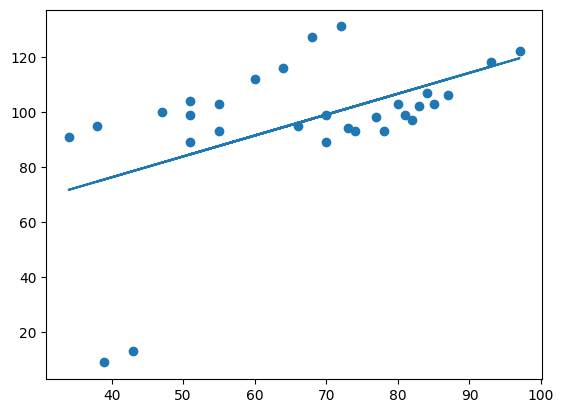

In [ ]:
plt.scatter(X,Y)
plt.plot(X,line)
plt.show()

Nhận xét
*  Đường thẳng hồi quy dốc lên một cách rõ ràng, củng cố kết luận về mối quan hệ tuyến tính dương. Đường này đi qua giữa các điểm dữ liệu, thể hiện mô hình đã ước tính. Sự phân tán của các điểm xung quanh đường thẳng cho thấy sự khác biệt giữa giá trị IQ thực tế và giá trị IQ dự đoán (phần dư - residuals), phản ánh mức R-squared thấp (0.259) của mô hình.